In [ ]:
!pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import os
import nibabel as nib
from monai.transforms import Compose, LoadImage, ScaleIntensity, ToTensor
import torch

# File paths
input_file_path = '/content/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii'  # Adjust this path to the location of your image
output_file_path = '/content/'  # Desired path for the normalized image

# Transformation pipeline
transforms = Compose([
    LoadImage(image_only=True),  # Corrected from LoadNifti to LoadImage
    ScaleIntensity(minv=0.0, maxv=1.0),
    # This will scale intensity values to the range [0, 1]
])

# Load and transform the image
image_data = transforms(input_file_path)  # Directly load and transform the image data

# Convert back to Numpy array if it's a tensor
if isinstance(image_data, torch.Tensor):
    image_data = image_data.numpy()

# Load the original Nifti file to preserve the header and affine
original_nii = nib.load(input_file_path)

# Create a new Nifti image with the transformed data
normalized_nii = nib.Nifti1Image(image_data, affine=original_nii.affine)

# Save the normalized image
nib.save(normalized_nii, output_file_path)
print(f"Saved normalized image to {output_file_path}")



Saved normalized image to /content/


In [ ]:
import os
import nibabel as nib
from monai.transforms import Compose, LoadImage, ScaleIntensity, ToTensor
import torch

base_dir = 'ADNI'  # Updated to 'ADNI' folder
save_dir = 'ADNI1'

# Transformation pipeline
transforms = Compose([
    LoadImage(image_only=True),  # Corrected from LoadNifti to LoadImage
    ScaleIntensity(minv=0.0, maxv=1.0),
    # This will scale intensity values to the range [0, 1]
])

# Process images in base_dir
for filename in os.listdir(base_dir):
    input_file_path = os.path.join(base_dir, filename)
    output_file_path = os.path.join(save_dir, filename)

    # Load and transform the image
    image_data = transforms(input_file_path)  # Directly load and transform the image data

    # Convert back to NumPy array if it's a tensor
    if isinstance(image_data, torch.Tensor):
        image_data = image_data.numpy()

    # Load the original NIfTI file to preserve the header and affine
    original_nii = nib.load(input_file_path)

    # Create a new NIfTI image with the transformed data
    normalized_nii = nib.Nifti1Image(image_data, affine=original_nii.affine)

    # Save the normalized image
    nib.save(normalized_nii, output_file_path)




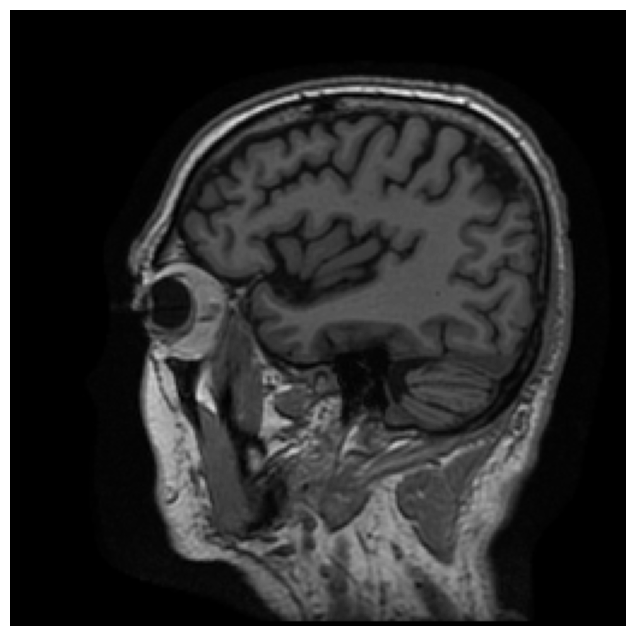

In [ ]:
import matplotlib.pyplot as plt

# Assuming image_data is a NumPy array containing the normalized image

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(image_data[:, :, 50], cmap='gray')  # Adjust the slice index (50) as needed
plt.axis('off')
plt.show()


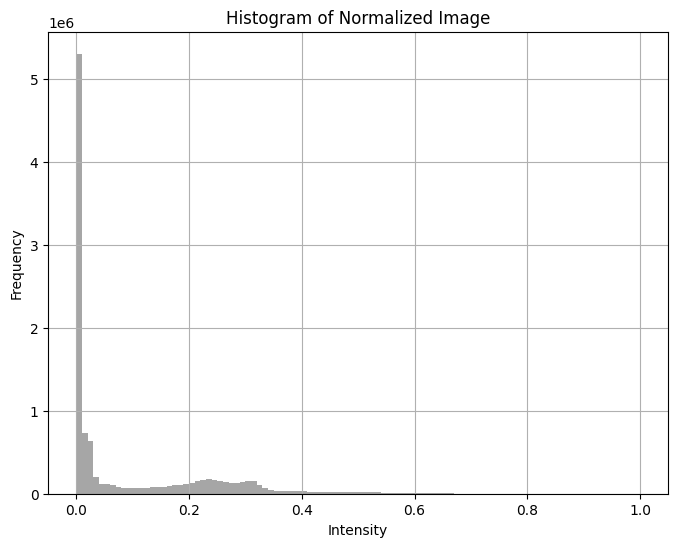

In [ ]:
import matplotlib.pyplot as plt

# Assuming image_data is a NumPy array containing the normalized image

# Flatten the image array to 1D
flat_image = image_data.flatten()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(flat_image, bins=100, range=(0.0, 1.0), color='gray', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Image')
plt.grid(True)
plt.show()


In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from nipype.interfaces import fsl
from datetime import datetime
from skimage.io import imread,imsave
import pandas as pd
import cv2 as cv
import cv2
from scipy.stats import entropy
from dltk.io.preprocessing import whitening

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np

# Assuming the first axis is the correct one for axial slices
slice_idx = image_data.shape[0] // 2  # Index for the middle slice

# Select the middle axial slice from both original and normalized volumes
axial_slice_original = image_data[slice_idx, :, :]
axial_slice_normalized = normalized_data[slice_idx, :, :]


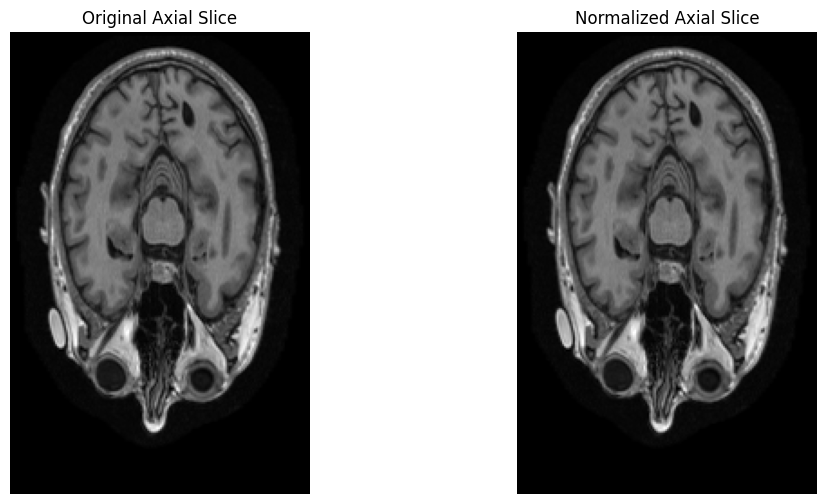

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Original axial slice
plt.subplot(1, 2, 1)
plt.imshow(axial_slice_original, cmap='gray', origin='lower')
plt.title('Original Axial Slice')
plt.axis('off')  # Hide the axes ticks

# Normalized axial slice
plt.subplot(1, 2, 2)
plt.imshow(axial_slice_normalized, cmap='gray', origin='lower')
plt.title('Normalized Axial Slice')
plt.axis('off')  # Hide the axes ticks

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


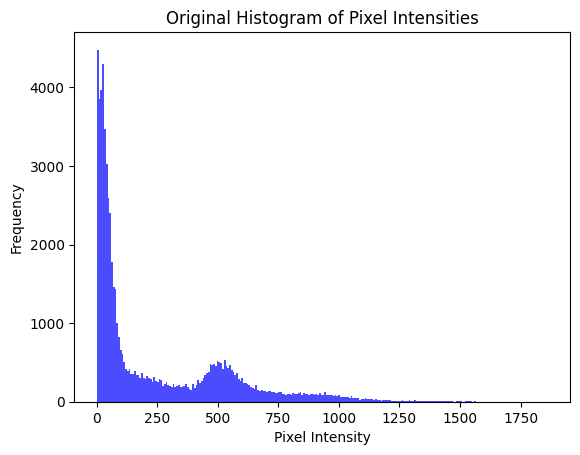

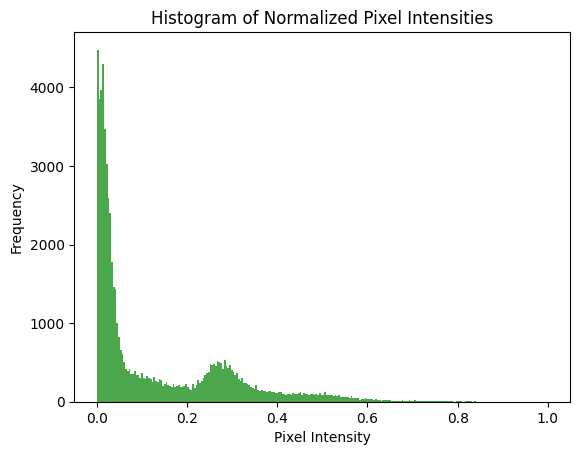

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

def plot_mri_histogram(mri_image, title, color):
    # Flatten the image to a 1D array for histogram calculation
    pixel_values = mri_image.flatten()

    # Plot histogram with an appropriate number of bins
    plt.hist(pixel_values, bins=256, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Load the DICOM file (assuming it's already in your local environment)
# Replace 'path_to_dicom_file.dcm' with the actual path to your DICOM file
dicom_path = '/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR/training/AD/I92398.nii'
ds = pydicom.dcmread(dicom_path)
mri_image = ds.pixel_array

dicom_path2 = '/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR1/training/AD/I92398.nii'
ds = pydicom.dcmread(dicom_path)
normalized_mri_image = ds.pixel_array

# Plot the original histogram with a color of choice, e.g., blue
plot_mri_histogram(mri_image, 'Original Histogram of Pixel Intensities', 'blue')

# Plot the histogram of the normalized image with a different color, e.g., green
plot_mri_histogram(normalized_mri_image, 'Histogram of Normalized Pixel Intensities', 'green')


In [ ]:
import os
import numpy as np
import SimpleITK as sitk
from skimage.io import imsave
from scipy.stats import entropy

SKS_MASK_DIR = 'C:/Users/sweth/Downloads/MASK_DIR''
AFFINE_REG_SKS_MASK_2D_IMAGES_DIR = 'C:/Users/sweth/AFFINE_REG_SKS_MASK_2D_IMAGES_DIR'

padd = 5
start = 25
end = 70
nb_img = 16

for indx, file in enumerate(os.listdir(SKS_MASK_DIR)):
    array = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(SKS_MASK_DIR, file)))

    graid_image = np.array([])
    data = np.array([])
    entpy_data = {}

    for i in range(start, end):
        value, counts = np.unique(array[i, :, :], return_counts=True)
        entpy_data[i] = entropy(counts, base=2)
    entpy_data = {k: v for k, v in sorted(entpy_data.items(), reverse=True, key=lambda item: item[1])}
    index_of_slices = list(entpy_data.keys())[0:nb_img]

    for i, max_indx in enumerate(index_of_slices):
        if (i + 1) % 4 == 0:
            data = np.hstack((data, array[max_indx, :, :]))
            if graid_image.size < 1:
                graid_image = data.copy()
            else:
                graid_image = np.vstack((graid_image, data))
            data = np.array([])

        else:
            if data.size < 1:
                data = array[max_indx, :, :]
            else:
                data = np.hstack((data, array[max_indx, :, :]))

    imsave(os.path.join(AFFINE_REG_SKS_MASK_2D_IMAGES_DIR, f'{file.replace(".nii.gz", "")}.png'), graid_image)
